In [60]:
import pandas as pd

In [61]:
customers = pd.read_csv("..\\data\\olist_customers_dataset.csv")
orders = pd.read_csv("..\\data\\olist_orders_dataset.csv", parse_dates=["order_purchase_timestamp"])
payments = pd.read_csv("..\\data\\olist_order_payments_dataset.csv")

In [62]:
customers.shape

(99441, 5)

In [63]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [64]:
customers["customer_unique_id"].nunique()

96096

In [65]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [66]:
orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [67]:
orders["order_purchase_timestamp"].min() , orders["order_purchase_timestamp"].max()

(Timestamp('2016-09-04 21:15:19'), Timestamp('2018-10-17 17:30:18'))

In [68]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [69]:
orders_delivered = orders[orders["order_status"] == "delivered"]
payments_agg = payments.groupby("order_id", as_index=False)["payment_value"].sum()
# groups any split payments ^
orders_with_payments = orders_delivered.merge(payments_agg, on="order_id", how="left")
df = orders_with_payments.merge(customers, on="customer_id", how="left")

In [70]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


<Axes: >

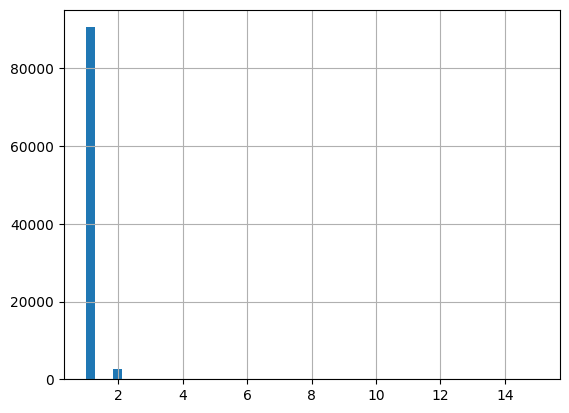

In [71]:
orders_per_cust = df.groupby("customer_unique_id")["order_id"].count()
orders_per_cust.hist(bins=50)
# only a few customers with multiple orders

<Axes: >

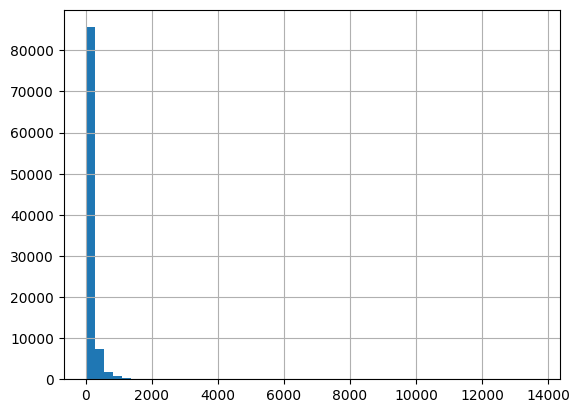

In [72]:
df["payment_value"].hist(bins=50)

In [73]:
reference_date = df["order_purchase_timestamp"].max()
print("Reference date:", reference_date)

Reference date: 2018-08-29 15:00:37


In [74]:
customer_features = (
    df.groupby("customer_unique_id")
    .agg(
        last_purchase=("order_purchase_timestamp", "max"),
        frequency=("order_id", "count"),
        monetary_value=("payment_value", "sum")
    )
    .reset_index()
)
customer_features["recency"] = (reference_date - customer_features["last_purchase"]).dt.days
customer_features["churn"] = (customer_features["recency"] > 180).astype(int)

In [75]:
customer_features.head()

,customer_unique_id,last_purchase,frequency,monetary_value,recency,churn
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90,111,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19,114,0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22,536,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62,320,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89,287,1


<Axes: >

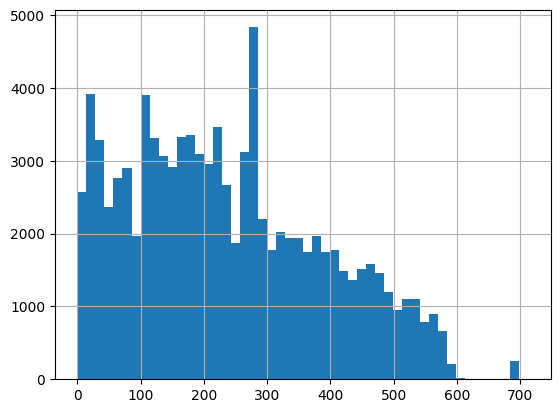

In [76]:
customer_features["recency"].hist(bins=50)

<Axes: >

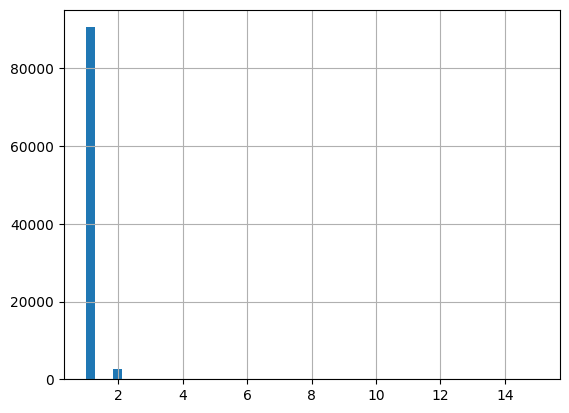

In [77]:
customer_features["frequency"].hist(bins=50)

<Axes: >

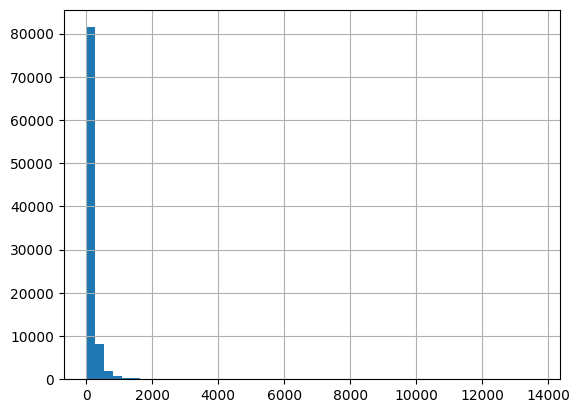

In [78]:
customer_features["monetary_value"].hist(bins=50)

<Axes: >

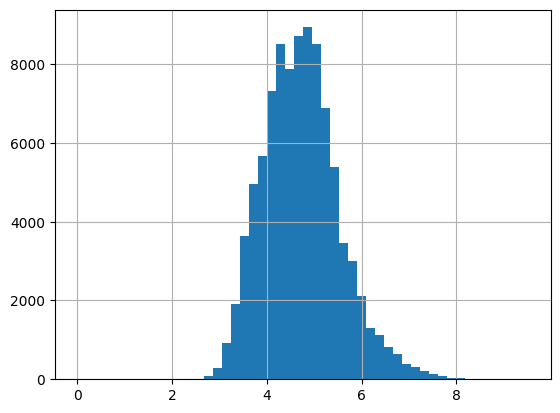

In [79]:
import numpy as np
customer_features["log_monetary"] = np.log1p(customer_features["monetary_value"])
customer_features["log_monetary"].hist(bins=50)

# applying log because theres not a lot of customers that are spending a lot
# doing this worked well in a linear regression model i had worked on for the coding club task

<Axes: xlabel='churn'>

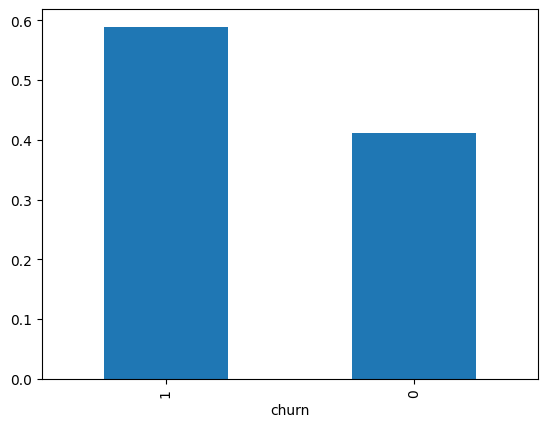

In [80]:
customer_features["churn"].value_counts(normalize=True).plot(kind="bar")
# around 60% of customers are "churned"

In [81]:
customer_features.head()

,customer_unique_id,last_purchase,frequency,monetary_value,recency,churn,log_monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90,111,0,4.962145
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19,114,0,3.338967
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22,536,1,4.468434
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62,320,1,3.798182
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89,287,1,5.287711
